# Red de proteínas
## Datos
Descripción de los datos
Los nodos representan proteínas y los enlaces representan interacciones entre proteínas.
Origen o método de obtención de los datos
Los datos provienen de Ryan A. Rossi and Nesreen K. Ahmed. “The Network Data Repository
with Interactive Graph Analytics and Visualization”. In: AAAI. 2015.
url: https://networkrepository.com.
Rohit Singh, Jinbo Xu, and Bonnie Berger. “Global alignment of multi-
ple protein interaction networks with application to functional orthology
detection”. In: PNAS 105.35 (2008), pp. 12763–12768

In [ ]:
#Importar los datos
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import pandas as pd

In [ ]:
files.upload()

Saving bio-dmela.mtx to bio-dmela (1).mtx


{'bio-dmela (1).mtx': b'%MatrixMarket matrix coordinate pattern symmetric \n7393 7393 25569\n179 1\n472 1\n953 1\n1038 1\n1882 1\n1969 1\n3488 1\n3937 1\n5301 1\n5995 1\n6135 1\n6337 1\n6446 1\n6932 1\n225 2\n271 2\n366 2\n505 2\n655 2\n656 2\n764 2\n874 2\n938 2\n961 2\n972 2\n1019 2\n1184 2\n1291 2\n1339 2\n1403 2\n1466 2\n1629 2\n1696 2\n1728 2\n1756 2\n2021 2\n2269 2\n2450 2\n2592 2\n3758 2\n3905 2\n4285 2\n4559 2\n4563 2\n4684 2\n4762 2\n4835 2\n5137 2\n5211 2\n5263 2\n5282 2\n5425 2\n5887 2\n5970 2\n6126 2\n6191 2\n6275 2\n7045 2\n7246 2\n426 3\n1185 3\n1220 3\n1426 3\n1803 3\n5512 3\n47 4\n1277 4\n2166 4\n3658 4\n3823 4\n5672 4\n5829 4\n198 5\n247 5\n539 5\n632 5\n1193 5\n1302 5\n1656 5\n1958 5\n2173 5\n2255 5\n2431 5\n2587 5\n3209 5\n5667 5\n5696 5\n5715 5\n24 6\n76 6\n116 6\n131 6\n143 6\n163 6\n176 6\n212 6\n276 6\n368 6\n398 6\n399 6\n472 6\n518 6\n584 6\n629 6\n650 6\n656 6\n718 6\n744 6\n789 6\n830 6\n1023 6\n1033 6\n1050 6\n1074 6\n1105 6\n1176 6\n1184 6\n1207 6\n1223 6\n

In [ ]:
f=open('bio-dmela.mtx', 'r')

In [ ]:
f.readline()

'953 1\n'

## Propiedades de la red
### Propiedades generales de la red

In [ ]:
#Celdas para calcular número de nodos, número de enlaces, grado promedio, etc.
# Pueden agregar tantas celdas como necesiten

In [ ]:
ruta = 'bio-dmela.mtx'
f=open('bio-dmela.mtx', 'r')
G=nx.Graph()
while True:
  linea = f.readline()
  if linea == '': break
  if linea[0]=='%' : continue
  if linea=='7393 7393 25569\n' : continue
  n1,n2 = linea.split(' ')
  n1, n2= int(n1) , int(n2)
  if n1==n2: continue
  G.add_edge(n1,n2)
f.close()

In [ ]:
N = len(G)
L = len(G.edges)
k = 2*L/N
C = nx.average_clustering(G)
p = k / (N-1)

In [ ]:
C_max = max([c for c in nx.connected_components(G)], key = len)

In [ ]:
Gm = nx.subgraph(G, C_max)

In [ ]:
print('Propiedades generales de la red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)

Propiedades generales de la red:
- El número de nodos es:	 7393
- El número de enlaces es:	 25569
- El grado promedio es:		 6.917083727850669


El coeficiente de clustering promedio de la red es:
 0.01185017524193749


In [ ]:
print("El diámetro es:", nx.diameter(Gm))

El diámetro es: 11


### Gráfica de medidas de centralidad
Ver última gráfica de https://curso-redes-f-ciencias-unam.github.io/ciencia-de-redes/medidas_y_metricas/practica_02/sesion_practica_02_notebook.html


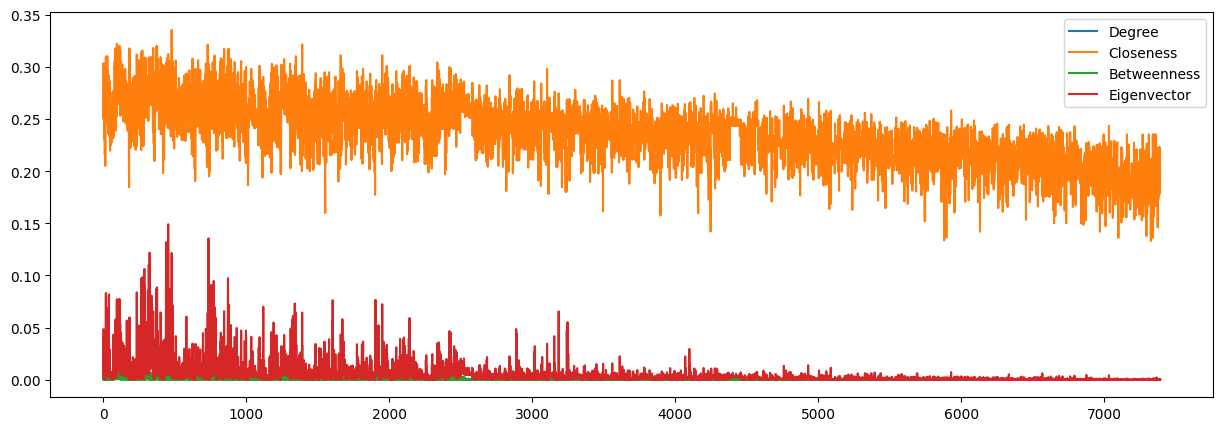

In [ ]:
diccionario = nx.degree_centrality(G)
d = np.array([diccionario[i] for i in G])

diccionario = nx.closeness_centrality(G)
c = np.array([diccionario[i] for i in G])

diccionario = nx.betweenness_centrality(G)
b = np.array([diccionario[i] for i in G])

diccionario = nx.eigenvector_centrality(G)
e = np.array([diccionario[i] for i in G])


plt.figure(figsize = [15, 5])
plt.plot(d, label = 'Degree')
plt.plot(c, label = 'Closeness')
plt.plot(b, label = 'Betweenness')
plt.plot(e, label = 'Eigenvector')

plt.legend()

### Visualización de un subconjunto de la red
Subconjunto de la red (de 500 a mil nodos) en la que dos propiedades de los nodos (grado, clustering o centralidades) se codifican con el color y el tamaño de los nodos... Explicar de qué variables se trata

In [ ]:
diccionario1 = nx.degree_centrality(G)
lista1 = [diccionario[i] for i in G]
colores = np.array(lista1)
colores = colores[1:500]


In [ ]:
diccionario2 = nx.closeness_centrality(G)
lista2 = [diccionario[i] for i in G]
tamaños = np.array(lista2)
tamaños = tamaños[1:500]

In [ ]:
nodos = list(G.nodes)
nodos = nodos[1:500]
subG = nx.subgraph(G, nodos)

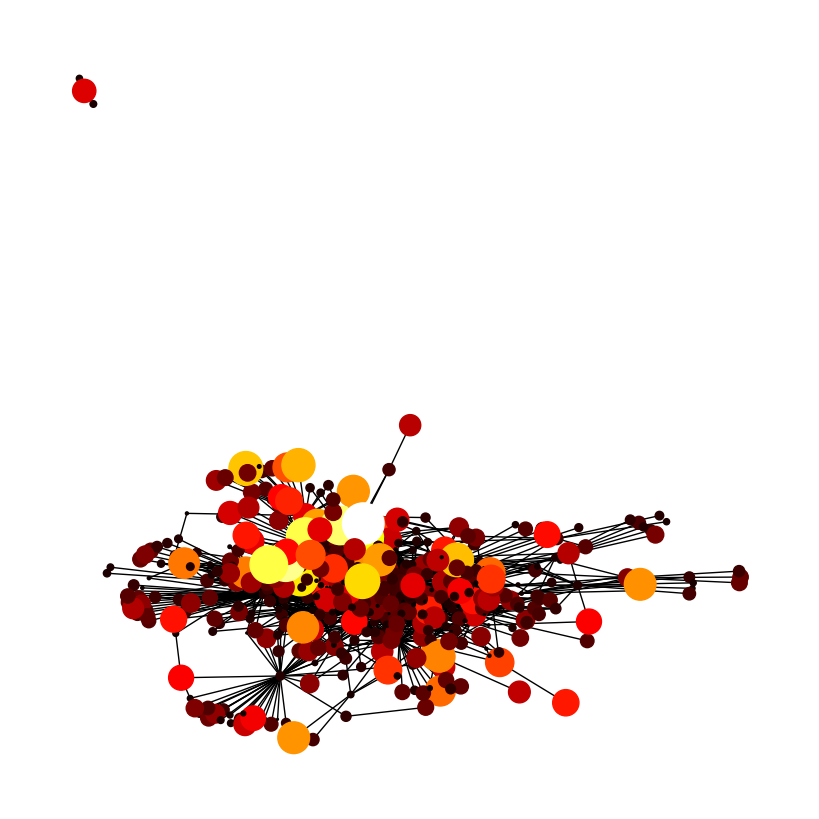

In [ ]:
plt.figure(figsize = [8,8])
nx.draw(subG,
        node_size = 6000*tamaños,
        node_color = colores,
        cmap = "hot")


### Distribución de grado
Elegir convenientemente las escalas de los nodos

In [ ]:
Degree={nx.degree(G)[nodo]:0 for nodo in G}
for nodo in G:
  Degree[nx.degree(G)[nodo]] +=1

In [ ]:
x=Degree.keys()
y=Degree.values()

Text(0, 0.5, 'Número de nodos')

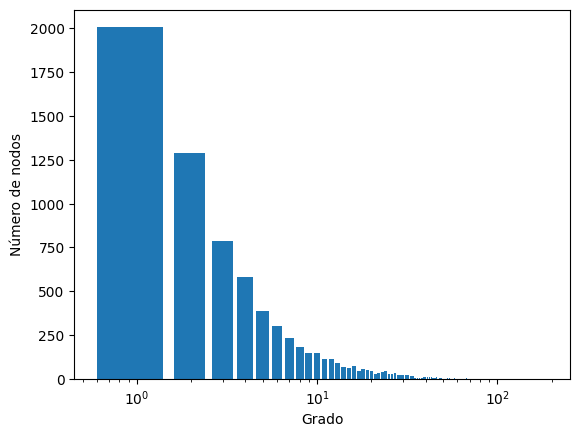

In [ ]:
plt.bar(x,y)
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Grado')
plt.ylabel('Número de nodos')

### Interpretación

Interpretación de las propiedades de la red:
Red rala. Tenemos un coeficiente de clustering pequeño, es decir que al enfocarnos en alguna proteína, las proteínas con las que interactua ésta casi no interactúan entre sí. Sin embargo, podemos pensar que a pesar de tener un coeficiente de clustering bajo, las proteínas tiene una interacción bastante grande como para tener un diámetro de 11.

Respecto a la distribución de grado, la mayoría de las proteínas tienen pocas interacciones con otras proteínas, lo cual se ve reflejado en la distribución de grado; se observa que la gran mayoría tiene un grado bajo.

No se tiene la propiedad de mundo pequeño debido a la gran diferencia que existe entre este(aproximadamente 4.6) y el diámetro.

## Comparación con modelos
### Modelo de red aleatoria G(N,p)
Ver https://curso-redes-f-ciencias-unam.github.io/ciencia-de-redes/redes_complejas_y_sus_propiedades/practica_04/sesion_practica_04_notebook.html

In [ ]:
# Comparación de distribución de grado con red aleatoria correspondiente.

In [ ]:
from scipy.stats import poisson

In [ ]:
def enlaces_aleatorios(N, p):
  for i in range(N):
    for j in range(i):
      if np.random.rand() < p:
        yield i,j

def red_aleatoria(N, p):
  G = nx.Graph()
  G.add_nodes_from(range(N)) # agrega todos los nodos

  G.add_edges_from( enlaces_aleatorios(N, p) ) # agrega los enlaces obedeciendo la probabilidad p

  return G

In [ ]:
grado_dict = dict(nx.degree(G))
clustering_dict = nx.clustering(G)

In [ ]:
df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']

In [ ]:
df.Degree
K = df.Degree.max()
y,x = np.histogram(df.Degree.values, bins = range(int(K)+1), density= True)
p = k / (N-1)
p

0.0009357526688109672

Text(0.5, 0, 'k')

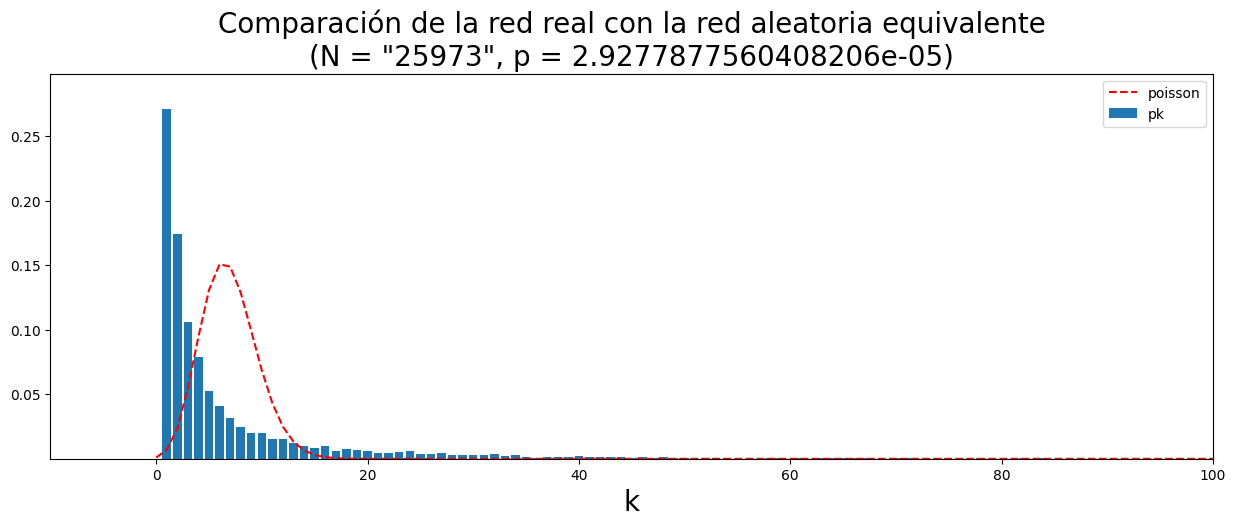

In [ ]:
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')

plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([-10,100])
plt.legend()
plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = "25973", p = 2.9277877560408206e-05)' , size = 20)
plt.xlabel('k', size = 20)

No se ajusta nada bien.

### Red con independencia de escala
A partir de la distribución de grado, encontrar el exponenete de la ley de potencia que mejor se ajuste (como se hizo en https://moodle.fciencias.unam.mx/cursos/mod/forum/view.php?id=66503 )

In [ ]:
!pip install powerlaw
import powerlaw

In [ ]:
grado_dict=dict(nx.degree(G))
Degree1=np.array([grado_dict[nodo] for nodo in G])

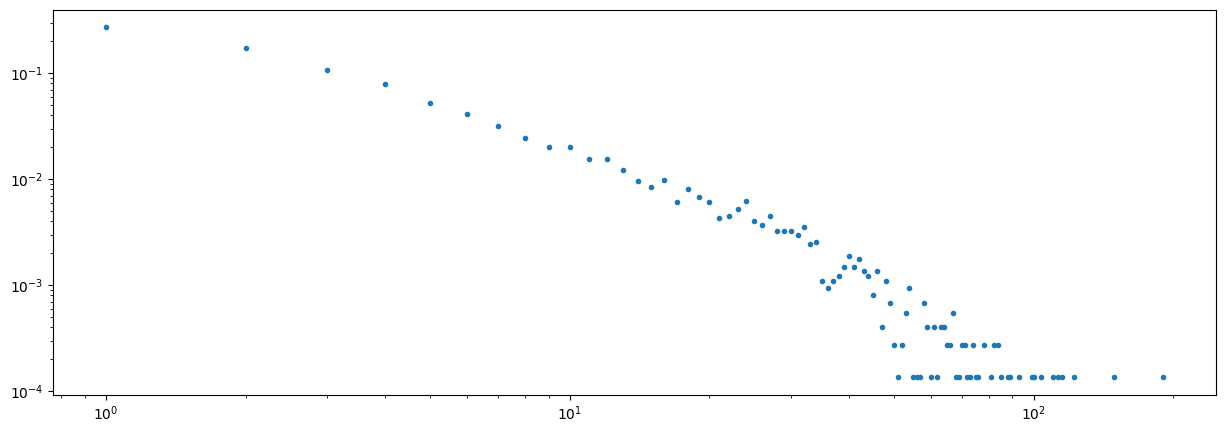

In [ ]:
K = Degree1.max()
y0, x0 = np.histogram(Degree1,
                     bins=range(int(K)+2),
                      density = True)

plt.figure(figsize = [15,5])
plt.plot(x0[:-1], y0, '.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
kmin=2
D=Degree1[Degree1 >= kmin]
alphar = 1 + len(D)*(np.log(D/kmin).sum())**(-1.)
alphar

1.9724891767247734

In [ ]:
fit = powerlaw.Fit(Degree1)

Calculating best minimal value for power law fit


In [ ]:
fit.alpha

5.016818205180042

<ipython-input-190-030fdbcbac9f>:4: RuntimeWarning: divide by zero encountered in power
  plt.plot(x,2*x**(-alphar), label = 'Distribución con alpha' )


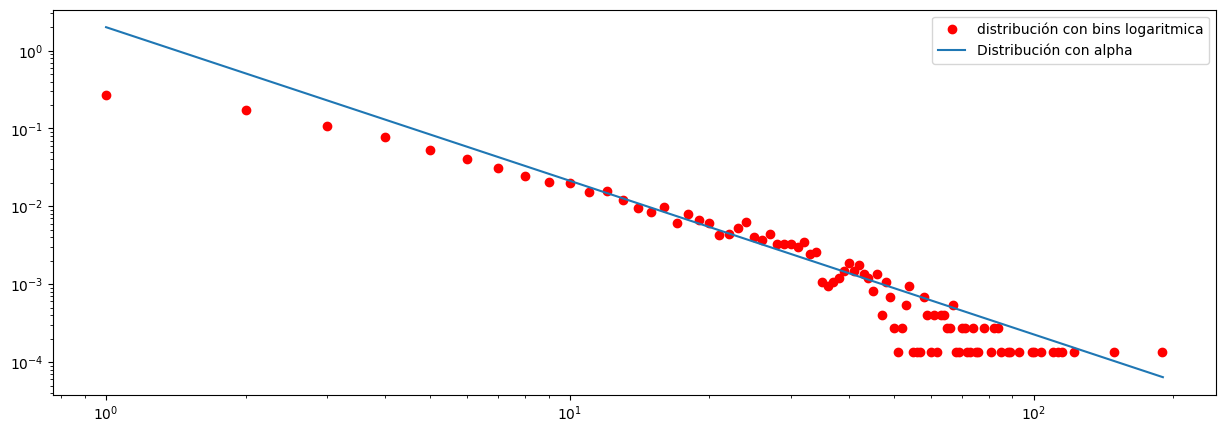

In [ ]:
plt.figure(figsize = [15,5])

plt.plot(x[:-1], y, 'ro', label = 'distribución con bins logaritmica' )
plt.plot(x,2*x**(-alphar), label = 'Distribución con alpha' )

plt.xscale('log')
plt.yscale('log')
plt.legend()

### Conclusiones
El ajuste con Poisson no ayuda en nada, mientras que al usar este segundo ajuste de ley de potencias con 2*x**(-alpha) donde alpha=1.9724891767247734, obtenemos mejores resultados. Esto concuerda con la parte teórica; las redes reales no se ajustan nada bien usando Poisson.

## Proceso
En este apartado se aplica algún proceso de los vistos (aclarar cuál) en los datos. Puede ser difusión, percolación, caminata aleatoria, randomización)

**Percolación**

In [ ]:
import random

In [ ]:
def percolacion_red(G,f,ataque=False):
    num_nodos_a_remover = int(f * G.number_of_nodes())

    if(ataque):
        nodos = [nodo for nodo,grado in sorted(G.degree(),key=lambda item:item[1],reverse=True)]
        nodos_a_remover = nodos[0:num_nodos_a_remover]
    else:
        nodos = list(G.nodes)
        nodos_a_remover = random.sample(nodos,num_nodos_a_remover)

    G.remove_nodes_from(nodos_a_remover)
    tamanio_max_comp = len(max(nx.connected_components(G),key=len))

    return tamanio_max_comp

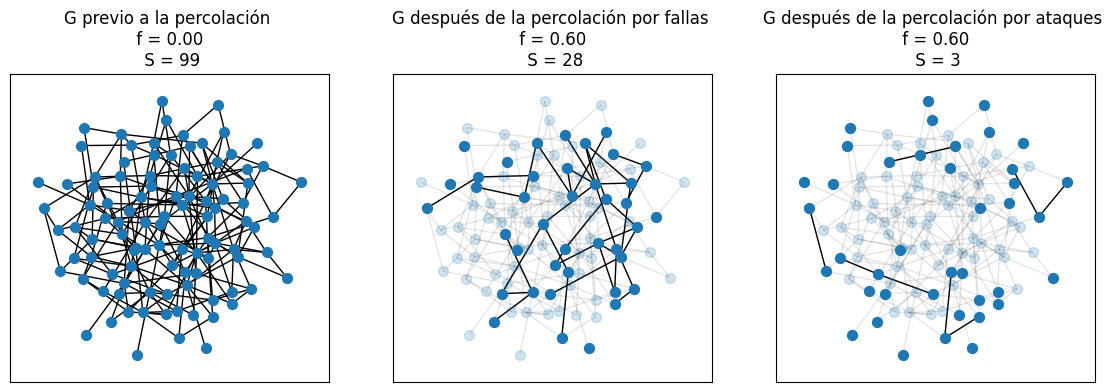

In [ ]:
N = 100
p = 0.05

f = 0.6

G = nx.gnp_random_graph(N,p)
G_1 = G.copy()
G_2 = G.copy()
pos = nx.kamada_kawai_layout(G)

fig, axs = plt.subplots(1,3,figsize=(14,4))
# se calcula el tamaño de la máxima componente
# y se grafica previo a la percolación (f=0)
tamanio_max_comp = percolacion_red(G,0)
nx.draw_networkx(G,pos,with_labels=False,ax=axs[0],node_size=50)
axs[0].set_title('G previo a la percolación \n f = %.2f \n S = %i' %(0,tamanio_max_comp))

# se corre la percolación por fallas en esa
# misma red y se grafica
tamanio_max_comp = percolacion_red(G_1,f)
nx.draw_networkx_edges(G,pos,alpha=0.1,ax=axs[1]) # se grafican enlaces originales como referencia
nx.draw_networkx_nodes(G,pos,node_size=50,ax=axs[1],alpha=0.2) # se grafican nodos originales como referencia
nx.draw_networkx(G_1,pos,with_labels=False,ax=axs[1],node_size=50)
axs[1].set_title('G después de la percolación por fallas \n f = %.2f \n S = %i' %(f,tamanio_max_comp))

# se corre la percolación por ataques en una
# copia de la red original
tamanio_max_comp = percolacion_red(G_2,f,ataque=True)
nx.draw_networkx_edges(G,pos,alpha=0.1,ax=axs[2]) # se grafican enlaces originales como referencia
nx.draw_networkx_nodes(G,pos,node_size=50,ax=axs[2],alpha=0.2) # se grafican nodos originales como referencia
nx.draw_networkx(G_2,pos,with_labels=False,ax=axs[2],node_size=50)
axs[2].set_title('G después de la percolación por ataques \n f = %.2f \n S = %i' %(f,tamanio_max_comp))

plt.show()

### Interpretación
Se trata de una red que corre riesgo de volverse inconexa, esto lo podemos ver con el tratamiento de la percolación; cuando comienzan a existir fallas o ataques en las proteínas, estas se van quedando incomunicadas con el resto de ellas. Sin embargo, hay que destacar que hay una diferencia entre las fallas y los ataques; cuando hay fallas en las proteínas la red sigue conservandose, aunque sea un poco; pero si se trata de ataques en las proteínas, la red queda casi completamente incomunicada, es decir que las proteínas tendrían casi nula interacción.

## Conclusión
¿Qué dirías a partir de todo el análisis realizado sobre el fenómeno que estás estudiando? ¿Qué otros análisis harías? ¿Qué otros datos utilizarías? ¿Qué preguntas de investigación plantearías?

Sería interesante realizar la parte de percolación a una red de proteínas priónicas para poder observar las posibles situaciones en las que se pueden contagiar las proteínas, puesto que las proteínas priónicas se contagian de forma exponencial, es decir, ¿cómo sería el contagio de los priones si se quitara al azar algunas proteínas?